In [376]:
import os
import numpy as np
import pandas as pd
#import lightgbm as lgb_model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import cross_val_score
SEED=1
data_path='/Users/yezhuoyang/Desktop/ml/p1/handout/train_shuffle.txt'
handout_path='/Users/yezhuoyang/Desktop/ml/p1/handout/test_handout.txt'
output_path='/Users/yezhuoyang/Desktop/ml/p1/handout/submission.csv'
def read(path):
    tag_list=[]
    input_list=[]
    with open(path,'r') as f:
       for line in f.readlines(): 
            tag_list.append(line.split('\t')[0].strip())
            input_list.append(line.split('\t')[1].strip())
    return input_list,tag_list    
def read_output(path):
    input_list=[]
    with open(path,'r') as f:
        for line in f.readlines():
            input_list.append(line.strip())
    return input_list        
def process(input_list,handout_list,tag_list,max_f=30000):
      label_list=[]
      data_list=[]
      transformer = TfidfTransformer()  
      vectorizer=CountVectorizer(min_df=1,ngram_range=(1,4),token_pattern='\w',max_features=max_f)
      for x in tag_list:
         if x=='0':
                label_list.append(0)
         else:
                label_list.append(1)     
      data_list= vectorizer.fit_transform(input_list+handout_list)
      return data_list[:len(input_list)],data_list[len(input_list):],np.array(label_list)
from sklearn.model_selection import train_test_split
X_handout=read_output(handout_path)
X_origin,y_origin=read(data_path)
X,X_handout,y=process(X_origin,X_handout,y_origin) 

In [353]:

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=0.0176)
sfm=SelectFromModel(svc,threshold=0.25)
sfm.fit(X,y)
X=model.transform(X)
X_handout=model.transform(X_handout)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=SEED)   

ValueError: The underlying estimator SVC has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [12]:
scoresx

array([0.9413972 , 0.93610013, 0.9353178 , 0.93310171, 0.94185875])

In [369]:
import csv
def write(y_pred,path):
    i=0
    y_pred=list(y_pred)
    with open(path,'w',newline='') as f:
        csv_write=csv.writer(f)
        csv_write.writerow(['id','pred'])
        for x in y_pred:
            csv_write.writerow([i,x])
            i=i+1
    f.close()        

In [370]:
write(y_pred,output_path)

第一个voting 尝试

In [183]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
clf1=SVC(C=0.0176,random_state=SEED,kernel="linear",probability=True)
clf2=MLPClassifier((80, 2),solver='lbfgs',alpha=167,early_stopping=False, random_state=SEED)
clf3=AdaBoostClassifier(n_estimators=100,random_state=SEED)
#clf4=RandomForestClassifier(n_estimators=100, max_features=3, random_state=SEED)#随机森林
eclf=VotingClassifier(estimators=[('1',clf1),('2',clf2),('3',clf3)],voting='soft')
params={'1__C':np.logspace(-1,1,20)}
grid=GridSearchCV(estimator=eclf,param_grid=params,cv=5)
scores=cross_val_score(grid,X[:1000],y[:1000], cv=5, scoring='roc_auc')

KeyboardInterrupt: 

In [ ]:
clf1=SVC(C=0.0176,random_state=SEED,kernel="linear",probability=True)
params={'clf__C':np.logspace(-1,1,20)}

In [39]:
clf1=SVC(C=0.0176,random_state=SEED,kernel="linear",probability=True)
clf2=MLPClassifier((35, 2),solver='lbfgs',alpha=0.01,early_stopping=False, random_state=SEED)
eclf=VotingClassifier(estimators=[('1',clf1),('2',clf2)],voting='soft')
s1=cross_val_score(clf1,X[:10000],y[:10000], cv=5, scoring='roc_auc')
s2=cross_val_score(clf2,X[:10000],y[:10000], cv=5, scoring='roc_auc')
s3=cross_val_score(eclf,X[:10000],y[:10000], cv=5, scoring='roc_auc')

In [102]:
import tensorflow as tf
from keras import backend as K
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [293]:
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc
from keras import regularizers
from keras.layers import Dropout
from keras import optimizers
def create_model(size=512,loss='binary_crossentropy',L1=0.000,L2=0,DROPOUT=0.002154434):
    # create model
    model = Sequential()
    model.add(Dense(size,input_dim=X.shape[1],kernel_regularizer=regularizers.l2(L2),activity_regularizer=regularizers.l1(L1),activation='relu'))
    model.add(Dropout(DROPOUT))
    model.add(Dense(size,activation='relu',kernel_regularizer=regularizers.l2(L2),activity_regularizer=regularizers.l1(L1)))
    model.add(Dense(1,activation='sigmoid'))
    adam=optimizers.Adam()
    model.compile(loss='binary_crossentropy',optimizer=adam, metrics=[auc])
    return model
from sklearn.metrics import roc_auc_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42) 

4213

In [216]:
model=create_model(learn_rate=0.01)
model.fit(X,y,verbose=1,epochs=5)
y_pred=model.predict_proba(X_handout)
y_pred=[x[0] for x in y_pred]

Epoch 1/5
16000/16000 [==============================] - 88s 5ms/step - loss: 0.6463 - auc: 0.8905
Epoch 2/5
16000/16000 [==============================] - 68s 4ms/step - loss: 0.4808 - auc: 0.9165
Epoch 3/5
 8704/16000 [===============>..............] - ETA: 31s - loss: 0.4667 - auc: 0.9209

KeyboardInterrupt: 

In [188]:

def test_epoch():
    epoch_size_list=tqdm([10,12,14])
    score=[]
    result=[]
    for B in epoch_size_list:
        model=create_model()
        model.fit(X_train,y_train,epochs=B,verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[B,s]
    epoch_size_list=list(epoch_size_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(epoch_size_list,score,label='score')
    ax.set_xlabel(r'epoch')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result1=test_epoch()

























  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/10
2688/6400 [===========>..................] - ETA: 29s - loss: 2.8499 - auc: 0.8018

KeyboardInterrupt: 

In [155]:
result1=[12,0]

In [260]:

def test_batch():
    bach_size_list=tqdm([10,15,20,25,30])
    score=[]
    result=[]
    for B in bach_size_list:
        model=create_model(L1=0,DROPOUT=0)
        model.fit(X,y,epochs=result1[0],batch_size=12,verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[B,s]
    bach_size_list=list(bach_size_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(bach_size_list,score,label='score')
    ax.set_xlabel(r'batch')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result2=test_batch()











































  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/12
16000/16000 [==============================] - 52s 3ms/step - loss: 0.3261 - auc: 0.8858
Epoch 2/12
16000/16000 [==============================] - 39s 2ms/step - loss: 0.2039 - auc: 0.9415
Epoch 3/12
16000/16000 [==============================] - 39s 2ms/step - loss: 0.1282 - auc: 0.9601
Epoch 4/12
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0788 - auc: 0.9719
Epoch 5/12
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0522 - auc: 0.9796
Epoch 6/12
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0403 - auc: 0.9845
Epoch 7/12
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0319 - auc: 0.9878
Epoch 8/12
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0253 - auc: 0.9901
Epoch 9/12
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0257 - auc: 0.9918
Epoch 10/12
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0233 - auc: 0.9930











































 20%|██        | 1/5 [08:17<33:10, 497.56s/it]

1.0
Epoch 1/12
16000/16000 [==============================] - 51s 3ms/step - loss: 0.3242 - auc: 0.8978
Epoch 2/12
16000/16000 [==============================] - 40s 2ms/step - loss: 0.2000 - auc: 0.9436
Epoch 3/12
 1140/16000 [=>............................] - ETA: 37s - loss: 0.1183 - auc: 0.9530

KeyboardInterrupt: 

(16000, 4242)

In [156]:
result2=[20,0]

In [190]:

def test_learn_rate():
    rate_list=tqdm(np.logspace(-4,0,10))
    score=[]
    result=[]
    for r in rate_list:
        model=create_model(learn_rate=r)
        model.fit(X_train,y_train,epochs=20,batch_size=12,verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[r,s]
    rate_list=list(rate_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(rate_list,score,label='score')
    ax.set_xlabel(r'batch')
    ax.set_xscale('log')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result5=test_learn_rate()


























  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/20
6400/6400 [==============================] - 83s 13ms/step - loss: 8.5546 - auc: 0.7438
Epoch 2/20
6400/6400 [==============================] - 73s 11ms/step - loss: 0.9619 - auc: 0.8566
Epoch 3/20
3324/6400 [==============>...............] - ETA: 34s - loss: 0.5179 - auc: 0.8832

KeyboardInterrupt: 

In [ ]:

def test_optimizer():
    opt_list=['sgd','adam']
    score=[]
    result=[]
    for o in opt_list:
        model=create_model(optimizer=o)
        model.fit(X_train,y_train,epochs=result1[0],batch_size=result2[0],verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[o,s]
    return result
result3=test_optimizer()

In [157]:
result3=['adam',0]

In [159]:

def test_loss():
    score=[]
    result=[]
    loss_list=['hinge','categorical_hinge','binary_crossentropy','categorical_crossentropy']
    for L in loss_list:
        model=create_model(optimizer=result3[0],loss=L)
        model.fit(X_train,y_train,epochs=result1[0],batch_size=result2[0],verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[L,s]
    return result
result4=test_loss()

KeyboardInterrupt: 

In [ ]:
result4














































  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10
12800/12800 [==============================] - 89s 7ms/step - loss: 0.3463 - auc: 0.8854
Epoch 2/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.2132 - auc: 0.9355
Epoch 3/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.1348 - auc: 0.9559
Epoch 4/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0866 - auc: 0.9690
Epoch 5/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0581 - auc: 0.9773
Epoch 6/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0456 - auc: 0.9828
Epoch 7/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0357 - auc: 0.9863
Epoch 8/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0334 - auc: 0.9889
Epoch 9/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0312 - auc: 0.9907
Epoch 10/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0283 - auc: 0.9920














































 20%|██        | 1/5 [13:08<52:33, 788.42s/it]

0.9465943615153579
Epoch 1/10
12800/12800 [==============================] - 94s 7ms/step - loss: 0.3456 - auc: 0.8827
Epoch 2/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.2112 - auc: 0.9354
Epoch 3/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.1340 - auc: 0.9570
Epoch 4/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0832 - auc: 0.9697
Epoch 5/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0569 - auc: 0.9781
Epoch 6/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0432 - auc: 0.9834
Epoch 7/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0373 - auc: 0.9869
Epoch 8/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0332 - auc: 0.9894
Epoch 9/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0292 - auc: 0.9911
Epoch 10/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0














































 40%|████      | 2/5 [26:30<39:37, 792.61s/it]

0.9394065241014282
Epoch 1/10
12800/12800 [==============================] - 90s 7ms/step - loss: 0.3465 - auc: 0.8889
Epoch 2/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.2137 - auc: 0.9366
Epoch 3/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.1362 - auc: 0.9568
Epoch 4/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0895 - auc: 0.9695
Epoch 5/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0587 - auc: 0.9777
Epoch 6/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0456 - auc: 0.9832
Epoch 7/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0414 - auc: 0.9867
Epoch 8/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0350 - auc: 0.9891
Epoch 9/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0336 - auc: 0.9909
Epoch 10/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0














































 60%|██████    | 3/5 [39:57<26:33, 796.70s/it]

0.9408907121156189
Epoch 1/10
12800/12800 [==============================] - 91s 7ms/step - loss: 0.3517 - auc: 0.8832
Epoch 2/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.2208 - auc: 0.9369
Epoch 3/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.1388 - auc: 0.9568
Epoch 4/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0892 - auc: 0.9701
Epoch 5/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0615 - auc: 0.9784
Epoch 6/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0516 - auc: 0.9837
Epoch 7/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0411 - auc: 0.9872
Epoch 8/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0379 - auc: 0.9895
Epoch 9/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0.0344 - auc: 0.9913
Epoch 10/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0














































 80%|████████  | 4/5 [53:21<13:18, 798.88s/it]

0.9348855024012174
Epoch 1/10
12800/12800 [==============================] - 94s 7ms/step - loss: 0.3625 - auc: 0.8873
Epoch 2/10
12800/12800 [==============================] - 80s 6ms/step - loss: 0.2283 - auc: 0.9374
Epoch 3/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.1467 - auc: 0.9576
Epoch 4/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0958 - auc: 0.9705
Epoch 5/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0670 - auc: 0.9788
Epoch 6/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0518 - auc: 0.9840
Epoch 7/10
12800/12800 [==============================] - 75s 6ms/step - loss: 0.0468 - auc: 0.9874
Epoch 8/10
12800/12800 [==============================] - 76s 6ms/step - loss: 0.0406 - auc: 0.9898
Epoch 9/10
12800/12800 [==============================] - 78s 6ms/step - loss: 0.0362 - auc: 0.9914
Epoch 10/10
12800/12800 [==============================] - 77s 6ms/step - loss: 0














































100%|██████████| 5/5 [1:06:51<00:00, 802.45s/it]

0.9336218520309394


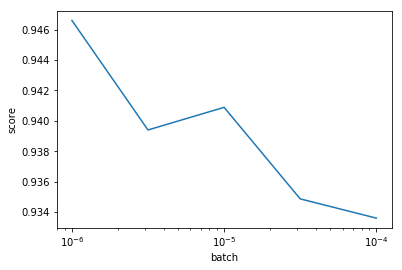

In [268]:

def test_l1():
    l1_list=tqdm(np.logspace(-6,-4,5))
    score=[]
    result=[]
    for l1 in l1_list:
        model=create_model(L1=l1,DROPOUT=0.022)
        model.fit(X_train,y_train,epochs=10,batch_size=5,verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[l1,s]
    l1_list=list(l1_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(l1_list,score,label='score')
    ax.set_xlabel(r'batch')
    ax.set_xscale('log')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result5=test_l1()

In [230]:
np.logspace(-4,-1,10)[5]

0.004641588833612777

In [ ]:
result5

In [ ]:

def test_l2():
    l2_list=tqdm(np.logspace(-2,-3,30))
    score=[]
    result=[]
    for l2 in l2_list:
        model=create_model(optimizer=result3[0],loss=result4[0],L1=result5[0],L2=l2)
        model.fit(X_train,y_train,epochs=result1[0],verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[l2,s]
    l2_list=list(l2_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(l2_list,score,label='score')
    ax.set_xscale('log')   
    ax.set_xlabel(r'batch')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result6=test_l2()

Epoch 1/10
12800/12800 [==============================] - 26s 2ms/step - loss: 0.3380 - auc: 0.8753
Epoch 2/10
12800/12800 [==============================] - 12s 948us/step - loss: 0.1974 - auc: 0.9397
Epoch 3/10
12800/12800 [==============================] - 12s 951us/step - loss: 0.1218 - auc: 0.9599
Epoch 4/10
12800/12800 [==============================] - 12s 969us/step - loss: 0.0756 - auc: 0.9722
Epoch 5/10
12800/12800 [==============================] - 12s 966us/step - loss: 0.0521 - auc: 0.9800
Epoch 6/10
12800/12800 [==============================] - 12s 957us/step - loss: 0.0392 - auc: 0.9848
Epoch 7/10
12800/12800 [==============================] - 12s 952us/step - loss: 0.0326 - auc: 0.9882
Epoch 8/10
12800/12800 [==============================] - 12s 949us/step - loss: 0.0269 - auc: 0.9904
Epoch 9/10
12800/12800 [==============================] - 12s 950us/step - loss: 0.0234 - auc: 0.9921
Epoch 10/10
12800/12800 [==============================] - 12s 950us/step - loss: 0.

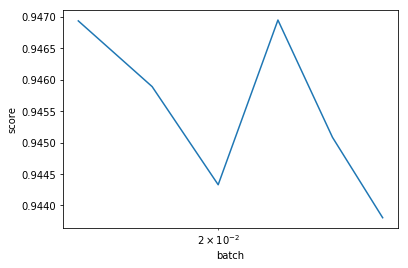

In [264]:
#X_train, X_test, y_train, y_test=train_test_split(X[:10000], y[:10000], test_size=.2, random_state=SEED)   
def test_d():
    D_list=[0.016,0.018,0.02,0.022,0.024,0.026]
    score=[]
    result=[]
    for D in D_list:
        model=create_model(DROPOUT=D,L1=0)
        model.fit(X_train,y_train,epochs=10,verbose=1)
        y_pred=model.predict_proba(X_test)
        y_pred=[x[0] for x in y_pred]
        s=roc_auc_score(y_test,y_pred)
        score.append(s)
        print(s)
        if(s==max(score)):
            result=[D,s]
    D_list=list(D_list)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(D_list,score,label='score')
    ax.set_xscale('log')   
    ax.set_xlabel(r'batch')
    ax.set_ylabel(r'score')
    plt.show()
    return result
result7=test_d()

In [265]:
result7

[0.022, 0.9469479149877209]

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<function matplotlib.pyplot.show(*args, **kw)>

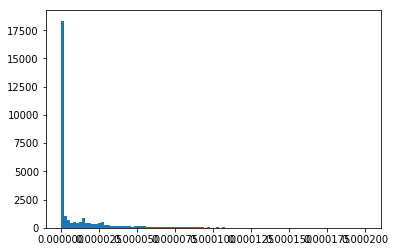

In [245]:
import matplotlib.pyplot as plt
plt.hist(clf.feature_importances_,bins=100,range=(0,0.0002))
plt.show

In [377]:
clf1=SVC(C=0.03,random_state=SEED,kernel="linear" ,probability=True)
clf2=MLPClassifier((30, 2),solver='lbfgs',alpha=120,early_stopping=False, random_state=SEED)
clf3=LogisticRegression(C=0.38486969)
#clf4=create_model()
clf4=AdaBoostClassifier(n_estimators=160)
clf_list=[clf1,clf2,clf3]

score=[]  
clf1.fit(X_train,y_train)
y_1=clf1.predict_proba(X_test)
y_1=[x[1] for x in y_1]
score.append(roc_auc_score(y_test,y_1))  

clf2.fit(X_train,y_train)
y_2=clf2.predict_proba(X_test)
y_2=[x[1] for x in y_2]
score.append(roc_auc_score(y_test,y_2))  

clf3.fit(X_train,y_train)
y_3=clf3.predict_proba(X_test)
y_3=[x[1] for x in y_3]
score.append(roc_auc_score(y_test,y_3))  


clf4.fit(X_train,y_train)
y_4=clf4.predict_proba(X_test)
y_4=[x[1] for x in y_4]
score.append(roc_auc_score(y_test,y_4))
#clf5.fit(X_train,y_train)
#y_5=clf5.predict_proba(X_test)
#y_5=[x[1] for x in y_5]
#score.append(roc_auc_score(y_test,y_5))

y_list=[y_1,y_2,y_3,y_4]

y_f=ave(y_list,[0.1,0.4,0.4,0.1])
score.append(roc_auc_score(y_test,y_f))

#y_5=ensemble([clf1,clf2,clf3],X_test,[0.3,0.3,0.4])
#score.append(roc_auc_score(y_test,y_5))   

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [379]:
score

[0.9456578347622786,
 0.9580740174593023,
 0.9582078998403811,
 0.9399825649611178,
 0.9583266175504637]

In [380]:
y_f=ave([y_2,y_3],[0.5,0.5])
roc_auc_score(y_test,y_f)

0.9584197719580102

In [364]:
y_list=[y_1,y_2,y_3,y_4]

y_f=ave(y_list,[0.1,0.4,0.4,0.1])
score.append(roc_auc_score(y_test,y_f))

In [368]:
clf3=LogisticRegression(C=0.38486969)
clf3.fit(X,y)
y_pred=clf3.predict_proba(X_handout)
y_pred=[x[1] for x in y_pred]

In [357]:

clf4.fit(X_train,y_train)
y_4=clf4.predict_proba(X_test)
y_4=[x[0] for x in y_4]
score.append(roc_auc_score(y_test,y_4))
#clf5.fit(X_train,y_train)
#y_5=clf5.predict_proba(X_test)
#y_5=[x[1] for x in y_5]
#score.append(roc_auc_score(y_test,y_5))
y_list=[y_1,y_2,y_3,y_4]
y_f=ave(y_list,[0.25,0.25,0.25,0.25])
score.append(roc_auc_score(y_test,y_f))

In [359]:
y_3

[0.9687884244224583,
 0.9941414777548641,
 0.009725372404573496,
 0.9908698600614783,
 0.8655210493412853,
 0.981731130548874,
 0.9856779380155124,
 0.996231744959919,
 0.906078256247885,
 0.9483977184748908,
 0.43068363181909264,
 0.6337485530982624,
 0.8159646436843163,
 0.9606026298000772,
 0.9659446663115073,
 0.9822906064768094,
 0.028544883177773372,
 0.9931313000697394,
 0.29728104173797976,
 0.9984589203023468,
 0.9861032503581164,
 0.9834808689155092,
 0.021123733798514954,
 0.9029205770595556,
 0.9241421843764448,
 0.5096883370934068,
 0.20656867025452263,
 0.9973362105246525,
 0.7426246915454571,
 0.9832069005968974,
 0.9792342913407224,
 0.07793561893009093,
 0.997035358038844,
 0.5603163448904322,
 0.9717779311238176,
 0.2105755538764732,
 0.9716594392659242,
 0.9787753960944633,
 0.9822084350774537,
 0.046024067384655476,
 0.48967429397936824,
 0.9892313592807193,
 0.9721890365812949,
 0.9050212508212591,
 0.9839477079066516,
 0.9783113744186124,
 0.27081484225636,
 0.352

In [358]:
score

[0.9456578347622786,
 0.9512958428004208,
 0.04178213480439308,
 0.06001743503888221,
 0.9156870289203274]

In [344]:
y_list=[y_1,y_2,y_3,y_4]
y_5=ave(y_list,[0.25,0.25,0.25,0.25])
score.append(roc_auc_score(y_test,y_5))

In [338]:
y_4=clf4.predict_proba(X_test)
y_4=[x[0] for x in y_4]
score.append(roc_auc_score(y_test,y_4))   

In [349]:
y_5=clf5.predict_proba(X_test)
y_5=[x[1] for x in y_5]
score.append(roc_auc_score(y_test,y_5))



y_list=[y_1,y_2,y_3,y_4,y_5]
y_f=ave(y_list,[0.2,0.2,0.2,0.2,0.2])
score.append(roc_auc_score(y_test,y_f))


In [323]:
y_4=ensemble([clf1,clf2,clf3],X_test,[0.3,0.3,0.4])
score.append(roc_auc_score(y_test,y_4)) 

In [332]:
y_3=clf3.predict_proba(X_test)


In [350]:
score

[0.9380991409903603,
 0.9353519200083962,
 0.9310659884481081,
 0.9318415697338298,
 0.9345449863828561,
 0.9345449863828561,
 0.9463227930176338]

In [335]:
y_3[0][0]

1.0

In [341]:
def ave(y_list,weight):
    L=len(y_list[0])
    y_pred=[]
    for i in range(0,L):
        data=0
        for j in range(0,len(y_list)):
            data=data+y_list[j][i]*weight[j]
        y_pred.append(data)
    return y_pred    
    

In [342]:
result=ave([[1,2,4],[3,3,3]],[0.5,0.5])

In [343]:
result

[2.0, 2.5, 3.5]

In [381]:

clf1=MLPClassifier((30, 2),solver='lbfgs',alpha=170,early_stopping=False, random_state=SEED)
clf2=LogisticRegression(C=0.38486969)

score=[]  
clf1.fit(X,y)
y_1=clf1.predict_proba(X_handout)
y_1=[x[1] for x in y_1]


clf2.fit(X,y)
y_2=clf2.predict_proba(X_handout)
y_2=[x[1] for x in y_2]


y_list=[y_1,y_2]
y_f=ave(y_list,[0.5,0.5])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [391]:
from sklearn.model_selection import cross_val_score
clf2=LogisticRegression(C=0.38486969)
np.mean(cross_val_score(clf2,X,y,cv=5))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8923751131347766

In [383]:
write(y_f,output_path)

In [389]:
X.shape

(16000, 30000)